# iris data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

iris_data = load_iris()
X = iris_data.data
Y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler().fit(X_train)
encoder = LabelBinarizer().fit(y_train)

#data for training phase
X_train = scaler.transform(X_train)
y_train = encoder.transform(y_train)

#data for testing phase
X_test = scaler.transform(X_test)
y_test = encoder.transform(y_test)


#Task1: MLP from scratch for iris

In [ ]:
# MLP 4-2-3
# train
# plot err convergen
# predict
# mse testing

class MLP:
  def __init__(self, eta=0.001, epoch=10000):
    self.eta = eta
    self.epoch = epoch
    self.w = np.random.randn(5, 2)
    self.beta = np.random.randn(3, 3)
    self.error = []

  def fit(self, X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    for _ in range(self.epoch):
      total_error = 0
      for x_i, y_i in zip(X, y):
        # Feedforward
        H = self.sigmoid(np.dot(x_i, self.w))
        H = np.hstack(([1], H))
        y_hat = self.sigmoid(np.dot(H, self.beta.T))

        # Backpropagation
        error = y_i - y_hat
        total_error += np.sum(error ** 2)

        # update
        delta_beta = self.eta * error * y_hat * (1 - y_hat)
        self.beta += np.outer(delta_beta, H)
        delta_w = self.eta * np.dot(delta_beta, self.beta[:, 1:]) * H[1:] * (1 - H[1:]) * x_i[:, np.newaxis]
        self.w += delta_w

      self.error.append(total_error / len(X))

  def predict(self, X):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    H = self.sigmoid(np.dot(X, self.w))
    H = np.hstack((np.ones((H.shape[0], 1)), H))
    y_hat = self.sigmoid(np.dot(H, self.beta.T))
    return y_hat

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

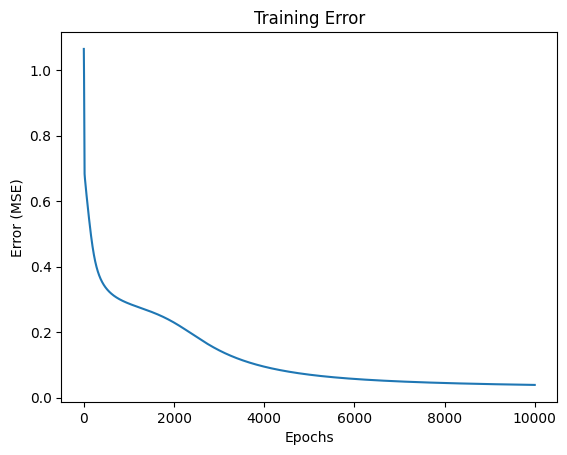

MSE is : 0.012872441006930984


In [ ]:
model = MLP(eta=0.03, epoch=10000)
model.fit(X_train, y_train)

plt.plot(model.error)
plt.xlabel('Epochs')
plt.ylabel('Error (MSE)')
plt.title('Training Error')
plt.show()

y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
print(f"MSE is : {mse}")